# Exemplo de Algorimo genético

Código original: https://hackernoon.com/genetic-algorithms-explained-a-python-implementation-sd4w374i

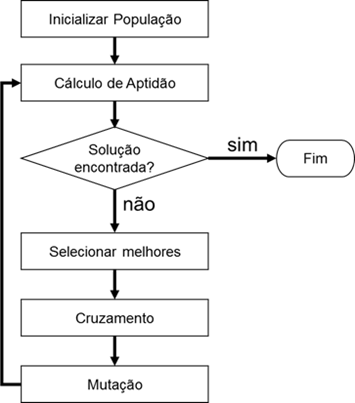

# Exemplo de um Algoritmo genético

Formulação do problema: **f(x, y) = sin(sqtr(x^2 + y^2))**

>Restrições do problema:
>x >= -4 OR x <= 4   
>y >= -4 OR y <= 4

>4 >= x >= -4   
>4 >= y >= -4

In [77]:
# Bibliotecas utilizadas
import random
import math as matematica

### Criando a população

Inicialmente é criado um população de forma **pseudoaleatória** com uma distribuição uniforme, em que cada número tem a mesma probabilidade de ser escolhido

In [78]:
# inicializar população, passando o tamanho e as restrições 
def gerar_populacao(tamanho_pop, limites_x, limites_y):
  menor_limite_x, maior_limite_x = limites_x
  menor_limite_y, maior_limite_y = limites_y
  populacao = []
  for i in range(tamanho_pop):
    individuo = {
        "x": random.uniform(menor_limite_x, maior_limite_x),
        "y": random.uniform(menor_limite_y, maior_limite_y),
    }
    populacao.append(individuo)
  return populacao

### Avaliar os indivíduos 

Nessa fase estamos avaliando os indivíduos através de uma função que é denomida como função objetivo

In [79]:
def funcao_objetivo(individuo):
  x = individuo["x"] 
  y = individuo["y"]
  return matematica.sin(matematica.sqrt(x ** 2 + y **2))



---



# Fase de seleção (Uso de roleta)

In [80]:
def escolha_por_roleta(populacao_ordenada, soma_aptidao):
  offset = 0
  normalizar_soma_aptidao = soma_aptidao

  menor_valor_aptidao = funcao_objetivo(populacao_ordenada[0])
  if menor_valor_aptidao < 0:
    offset = -menor_valor_aptidao
    normalizar_soma_aptidao += offset * len(populacao_ordenada)
  
  roleta = random.uniform(0, 1)

  acumalativo = 0
  for individuo in populacao_ordenada:
    aptidao = funcao_objetivo(individuo) + offset
    probabilidade = aptidao / normalizar_soma_aptidao
    acumalativo += probabilidade

  if roleta <= acumalativo:
    return individuo

In [81]:
def ordenar_populacao_por_aptidao(populacao):
  return sorted(populacao, key=funcao_objetivo)

# Fase de crossover

In [82]:
def cruzamento(individuo_a, individuo_b):
  xa = individuo_a["x"]
  ya = individuo_a["y"]
  xb = individuo_b["x"]
  yb = individuo_b["y"]
  return {"x": (xa + xb) / 2, "y": (ya + yb) / 2}

# Mutação

In [83]:
def mutacao(individuo):
  x = individuo["x"] + random.uniform(-0.05, 0.05)
  y = individuo["y"] + random.uniform(-0.05, 0.05)
  
  limite_inferior, limite_superior = (-4, 4)

  x = min(max(x, limite_inferior), limite_superior)
  y = min(max(y, limite_inferior), limite_superior)

  return {"x": x, "y": y}

# Definindo uma nova geração

In [84]:
def gerar_proxima_geracao(geracao_anterior):
  proxima_geracao = []
  populacao_ordenada_por_aptidao = ordenar_populacao_por_aptidao(geracao_anterior)
  tamanho_populacao = len(geracao_anterior)
  soma_aptidao = sum(funcao_objetivo(individuo) for individuo in populacao) 

  for i in range(tamanho_populacao):
    primeiro_pai = escolha_por_roleta(populacao_ordenada_por_aptidao, soma_aptidao)
    segundo_pai = escolha_por_roleta(populacao_ordenada_por_aptidao, soma_aptidao)

    individuo = cruzamento(primeiro_pai, segundo_pai)
    individuo = mutacao(individuo)
    proxima_geracao.append(individuo)

  return proxima_geracao

# Executar o AG

In [ ]:
# Definir o tamanho das gerações
geracoes = 50

populacao = gerar_populacao(10, (-4, 4), (-4, 4))

indice = 1
while True:
  print(f"🧬 Geração {i}")

  for individuo in populacao:
    print(individuo, funcao_objetivo(individuo))

  if indice == geracoes:
    break
  indice += 1
  populacao = gerar_proxima_geracao(populacao)


melhor_individuo = ordenar_populacao_por_aptidao(populacao)[-1]
print("\n\n\n🔬 RESULTADO FINAL")
print(melhor_individuo, funcao_objetivo(individuo))



---



# Usando biblioteca python

In [48]:
pip install ga

  Created wheel for ga: filename=ga-0.1.1.dev0-py3-none-any.whl size=19472 sha256=6290df5bdf3c90ec870d4b78e1177c2609c11827159c0b88e356b943542db1c8
  Stored in directory: /root/.cache/pip/wheels/23/86/27/67b13c980a3673957d40a8e2cfbb89db59913324354a9abef2
Successfully built ga


In [49]:
import ga 

In [53]:
length = 4
g = ga.chromosomes.BinaryGene.create_random(length)  # BinaryGene.GENETIC_MATERIAL_OPTIONS = '10'
print(g.dna)

1010


In [61]:
g = ga.chromosomes.BinaryGene('1111')
g.mutate(0.05)  # 100% chance that each element will mutate
print(g.dna)

1111
